In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('..')

from src.datasets import SpermDataset, get_datasets
import random
import numpy as np

In [3]:
folder_path = r"C:\Users\C0101\PycharmProjects\cc7221\tarea4\data\SpermSegGS"
dataset, _, _ = get_datasets(folder_path)

In [4]:
def random_crop_mask(arr: np.ndarray, min_area: int = 9000, max_area: int = 50000):
    """
    Creates a random boolean mask with a minimal area.
    """
    found = False
    points = []
    for _ in range(10):
        fp = int(arr.shape[0] * random.random() * 0.8), int(arr.shape[1] * random.random() * 0.8)
        sp_x = int(fp[0] + (arr.shape[0]-fp[0]) * random.random())
        sp_y = int(fp[1] + (arr.shape[1]-fp[1]) * random.random())
        area = (fp[0] - sp_x) * (fp[1] - sp_y)
        if area > min_area:
            if area < max_area:
                first_point = fp
                second_point = (sp_x, sp_y)
                found = True
                break
            points.append((fp, (sp_x, sp_y), area))
            continue
        points.append((fp, (sp_x, sp_y), area))
    
    if not found:
        points.sort(reverse=True, key=lambda x: x[2])
        first_point = points[0][0]
        second_point = points[0][1]
    mask = np.zeros_like(arr)
    mask[first_point[0]:second_point[0], first_point[1]:second_point[1]] = 1
    return mask > 0

In [5]:
idx = 0
idx2 = 1
idx_key = list(dataset.data.keys())[idx]
idx_key2 = list(dataset.data.keys())[idx2]
img = dataset.data[idx_key]
seg = dataset.segmentation_masks[idx_key]
img2 = dataset.data[idx_key2]
seg2 = dataset.segmentation_masks[idx_key2]

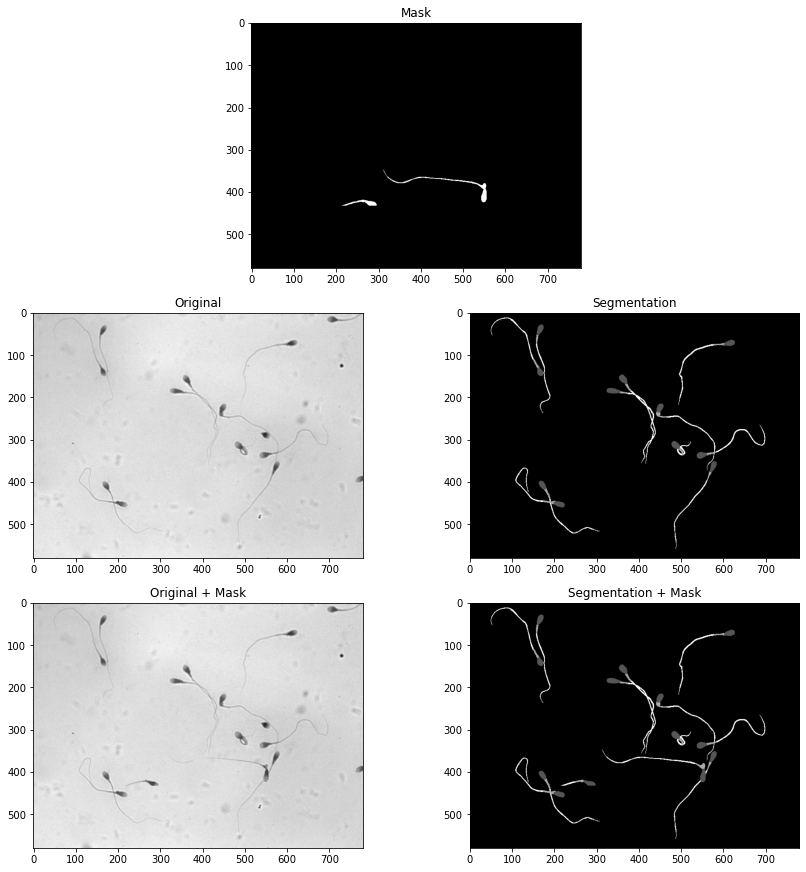

In [17]:
random_mask = random_crop_mask(img, min_area=12000)
random_mask = np.logical_and(random_mask, seg2 != 0)
result_img, result_seg = np.copy(img), np.copy(seg)

result_img[random_mask] = img2[random_mask]
result_seg[random_mask] = seg2[random_mask]

fig3 = plt.figure(constrained_layout=True, figsize=(12, 12))
gs = fig3.add_gridspec(3, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('Mask')
f3_ax1.imshow(random_mask, cmap='gray')

f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax2.set_title('Original')
f3_ax2.imshow(img, cmap='gray')

f3_ax3 = fig3.add_subplot(gs[1, 1])
f3_ax3.set_title('Segmentation')
f3_ax3.imshow(seg, cmap='gray')

f3_ax4 = fig3.add_subplot(gs[2, 0])
f3_ax4.set_title('Original + Mask')
f3_ax4.imshow(result_img, cmap='gray')

f3_ax5 = fig3.add_subplot(gs[2, 1])
f3_ax5.set_title('Segmentation + Mask')
f3_ax5.imshow(result_seg, cmap='gray')
plt.savefig("sample_aug.png", dpi=300)

In [99]:
import torch

In [100]:
x = [torch.rand((2, 3, 200, 200)) for _ in range(2)]

In [107]:
x_cat = torch.cat(x, dim=0)

In [108]:
x_cat[0].shape

torch.Size([3, 200, 200])